# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [4]:
import math
import sys

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [6]:
# YOUR CODE HERE

link = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_white/wine_quality_white.tsv.gz" 

wine_data = pd.read_csv(link, sep="\t")
wine_data.sample(n=10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
536,7.9,0.345,0.51,15.3,0.047,54.0,171.0,0.99870,3.09,0.51,9.1,5
205,6.4,0.210,0.50,11.6,0.042,45.0,153.0,0.99720,3.15,0.43,8.8,5
2333,6.8,0.370,0.28,1.9,0.024,64.0,106.0,0.98993,3.45,0.60,12.6,8
4585,5.0,0.330,0.23,11.8,0.030,23.0,158.0,0.99322,3.41,0.64,11.8,6
2170,7.4,0.190,0.30,12.8,0.053,48.5,229.0,0.99860,3.14,0.49,9.1,7
3872,7.3,0.360,0.54,13.3,0.054,63.0,193.0,0.99864,3.06,0.49,8.6,4
3510,7.0,0.220,0.24,11.0,0.041,75.0,167.0,0.99508,2.98,0.56,10.5,6
1830,7.7,0.440,0.24,11.2,0.031,41.0,167.0,0.99480,3.12,0.43,11.3,7
358,10.0,0.200,0.39,1.4,0.050,19.0,152.0,0.99400,3.00,0.42,10.4,6
2295,7.5,0.420,0.19,6.9,0.041,62.0,150.0,0.99508,3.23,0.37,10.0,6


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [7]:
# YOUR CODE HERE
wine_data.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'target']

YOUR ANSWERS HERE

Fixed Acidity - Continuous variable that measures the acids that come from grapes and through yeast

Volatile Acidity - Continuous variable that measures the acids that are produiced during fermentation

Citric Acid - Continuous variable that is used to regulate acidity and the fermentation process   

Residual Sugar - Continuous variable that measures the amount of sugar remaining after fermentation

Chlorides - Continuous variable that measures the salinity of the wine

Free Sulfur Dioxide - Continuous variable that measures the amount of unbounded sulfur dioxide available to prevent spoilage and oxidation

Total Sulfur Dioxide - Continuous variable that measures the total amount of bounded and unbounded sulfur dioxide in the wine

Density - Continuous variable that measures the compactness of the wine

pH - Continuous variable that measures concentration of hydrogen ions, representing the acidity or alkalinity of the wine

Sulphates - Continuous variable that measures the amount naturally occurring compouunds, both produced through feremenation and those added later, that maintain the wine's flavor and freshness

Alcohol - Continuous variable that measures the percentage of alcohol content in the wine,correlated with the amount of sugar developed in the grapes at harvest

Target - Ordinal variable that represents the sensory based quality score by taking the median score of at least 3 wine experts

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

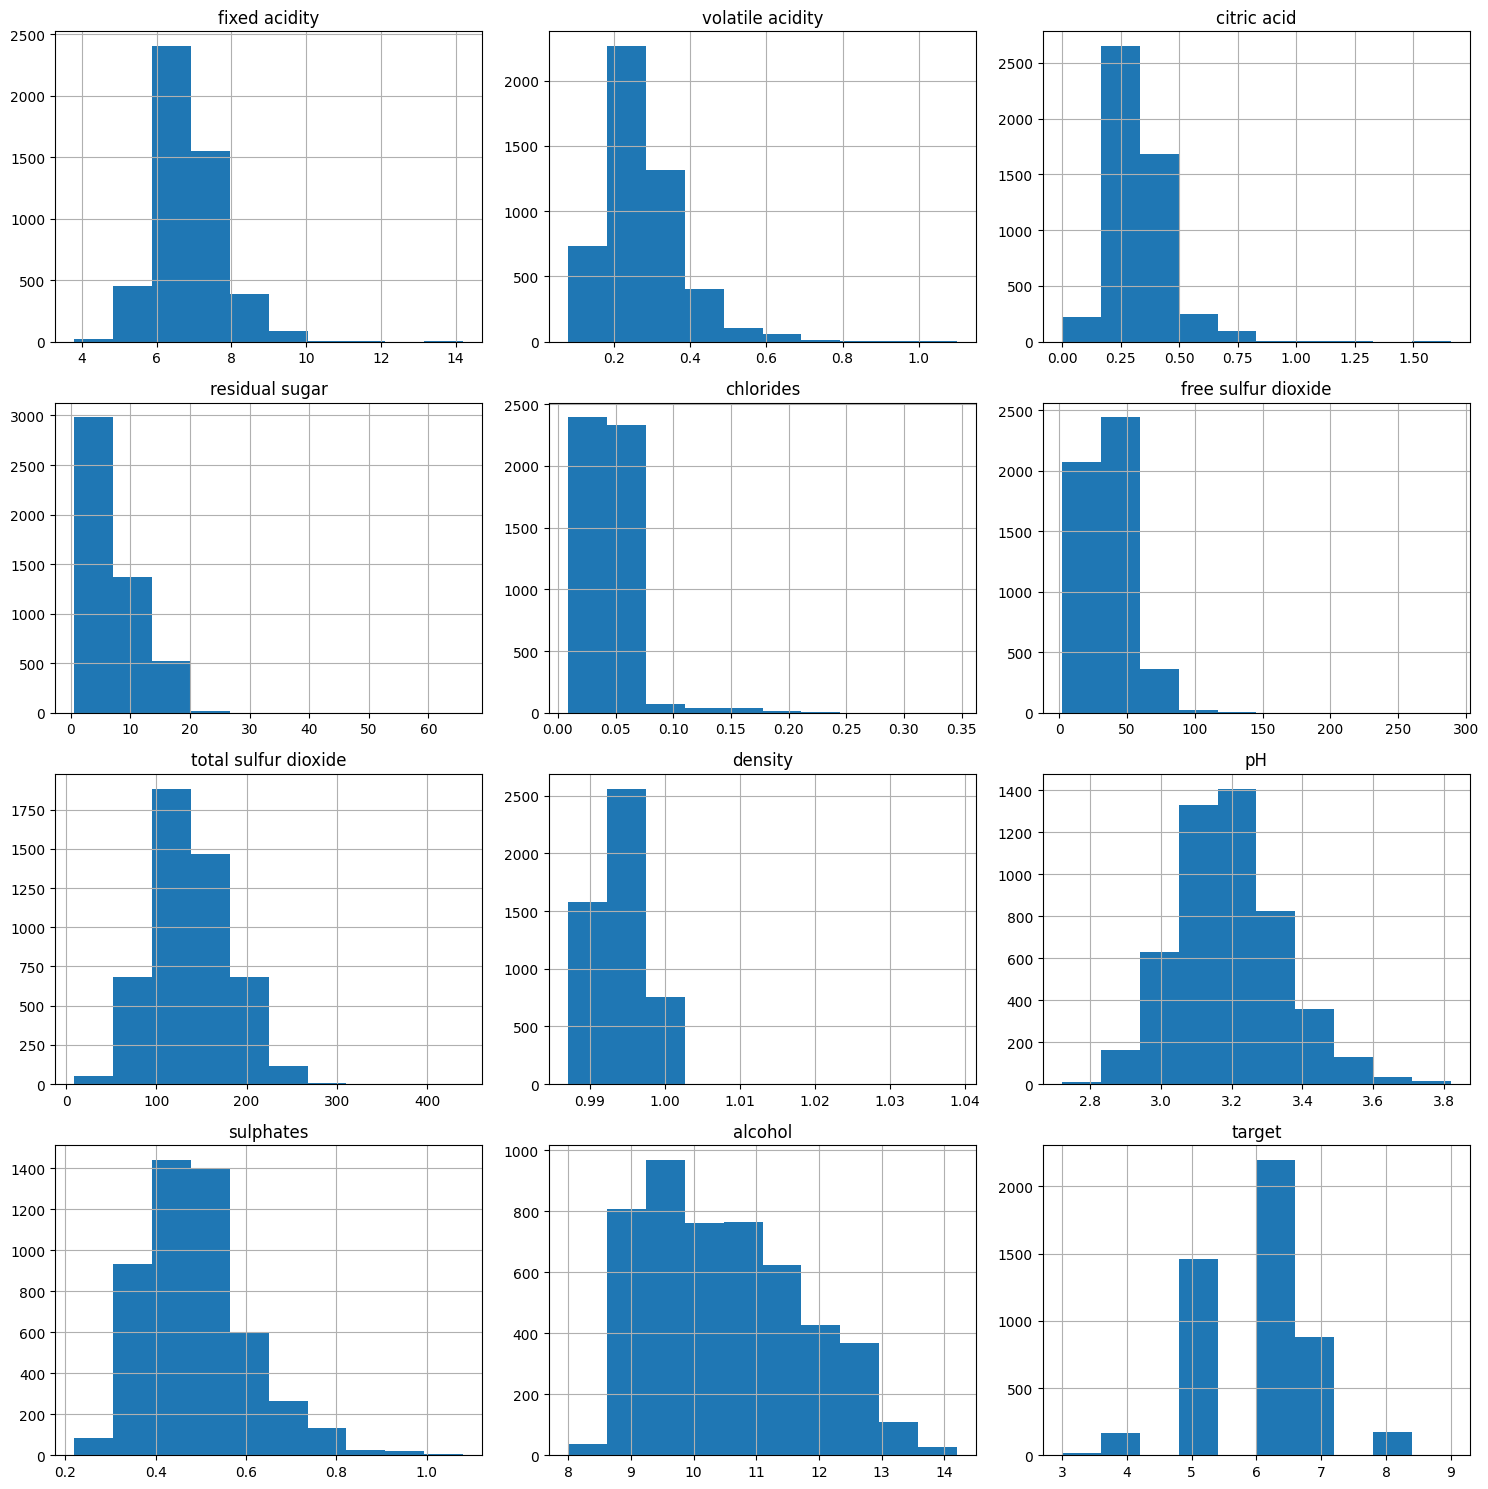

In [8]:
# YOUR CODE HERE

wine_data.hist(figsize=(15, 15))
plt.tight_layout()
plt.show()


YOUR ANSWERS HERE

Fixed Acidity - Right/Positively Skewed

Volatile Acidity - Right/Positively Skewed

Citric Acid - Right/Positively Skewed

Residual Sugar - Right/Positively Skewed

Chlorides - Right/Positively Skewed

Free Sulfur Dioxide - Right/Positively Skewed

Total Sulfur Dioxide - Gaussian Distribution

Density - Gaussian Distribution 

pH - Gaussian Distribution 

Sulphates - Right/Positively Skewed

Alcohol - Right/Positively Skewed

Target - Binomial Distribution

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

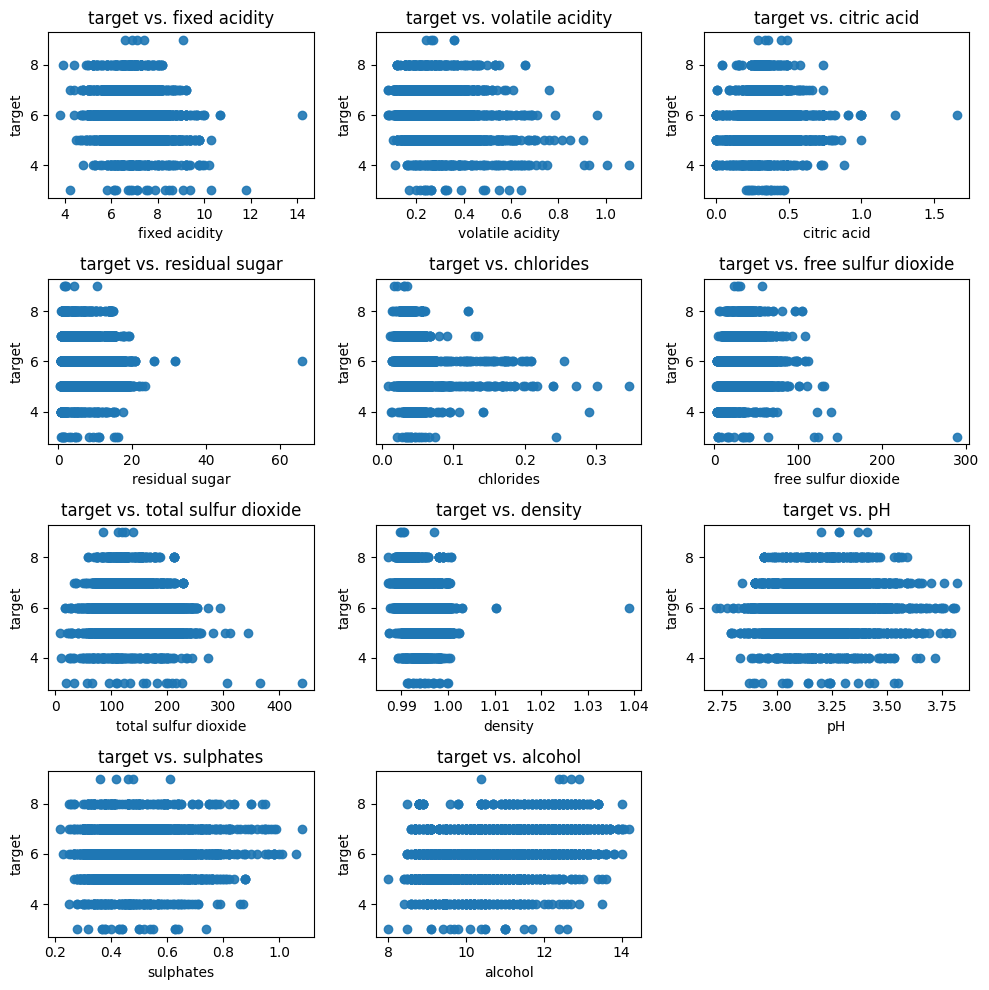

In [9]:
# YOUR CODE HERE

input_columns = wine_data.columns.drop('target')
output_column = 'target'

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

axes = axes.flatten()

for i, col in enumerate(input_columns):
    ax = axes[i]
    ax.scatter(wine_data[col], wine_data[output_column], alpha=0.9)
    ax.set_title(f'{output_column} vs. {col}')
    ax.set_xlabel(col)
    ax.set_ylabel(output_column)

for i in range(len(input_columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

Target vs. Fixed Acidity - Independent

Target vs. Volatile Acidity - Depedent 

Target vs. Citric Acid - Independent

Target vs. Residual Sugar - Dependent 

Target vs. Chlorides - Dependent 

Target vs. Free Sulfur Dioxide - Independent

Target vs. Total Sulfur Dioxide - Independent 

Target vs. Density - Independent 

Target vs. pH - Independent 

Target vs. Sulphates - Dependent

Target vs. Alcohol - Dependent 

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

Mean Squared Error: 0.5631540629886568


Text(0.5, 1.0, 'Actual vs. Predicted Wine Quality')

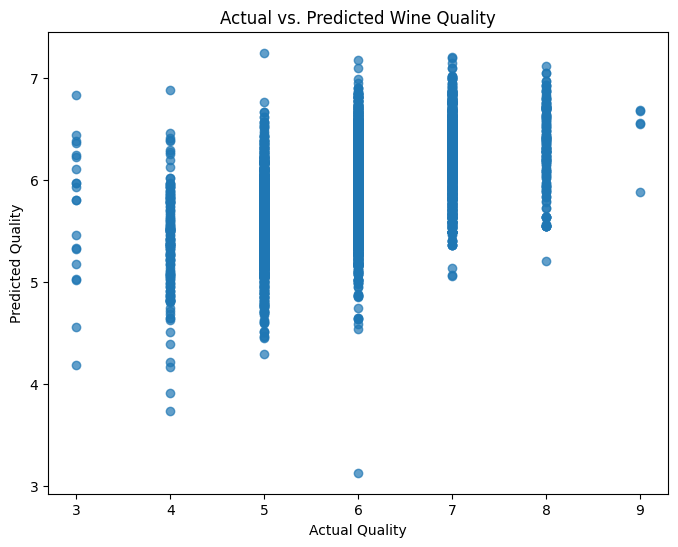

In [10]:
# YOUR CODE HERE

input_columns = wine_data.columns.drop('target')
X = wine_data[input_columns]
y = wine_data['target']

model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

mse = np.mean((predictions - y) ** 2)
print(f'Mean Squared Error: {mse}')

plt.figure(figsize=(8, 6))
plt.scatter(y, predictions, alpha=0.7)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs. Predicted Wine Quality")



YOUR ANSWERS HERE

Mean Squared Error = 0.5631540629886568

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [11]:
# YOUR CODE HERE

input_columns = wine_data.columns.drop('target')
y = wine_data['target']

mse_scores = {}

for col in input_columns:
    X_single = wine_data[[col]]
    
    model = sklearn.linear_model.LinearRegression()
    model.fit(X_single, y)
    
    predictions = model.predict(X_single)
    
    mse = np.mean((y - predictions)**2)
    mse_scores[col] = mse

best_column = min(mse_scores, key=mse_scores.get)
min_mse = mse_scores[best_column]

print("MSE for each single-column model:")
for col, mse in mse_scores.items():
    print(f"- {col}: {mse:.4f}")

print(f"\nThe best single input column is '{best_column}' with an MSE of {min_mse:.4f}.")

MSE for each single-column model:
- fixed acidity: 0.7741
- volatile acidity: 0.7545
- citric acid: 0.7841
- residual sugar: 0.7767
- chlorides: 0.7496
- free sulfur dioxide: 0.7841
- total sulfur dioxide: 0.7603
- density: 0.7102
- pH: 0.7764
- sulphates: 0.7819
- alcohol: 0.6354

The best single input column is 'alcohol' with an MSE of 0.6354.


YOUR ANSWERS HERE

The MSE value of Problem 5 is lower than that of Problem 6, meaning that it tends to generalize better to new, unseen data. 

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

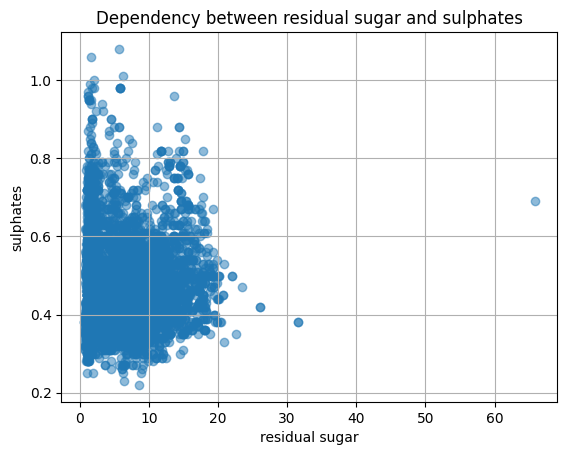

Using a threshold of t = 5.20 for 'residual sugar'


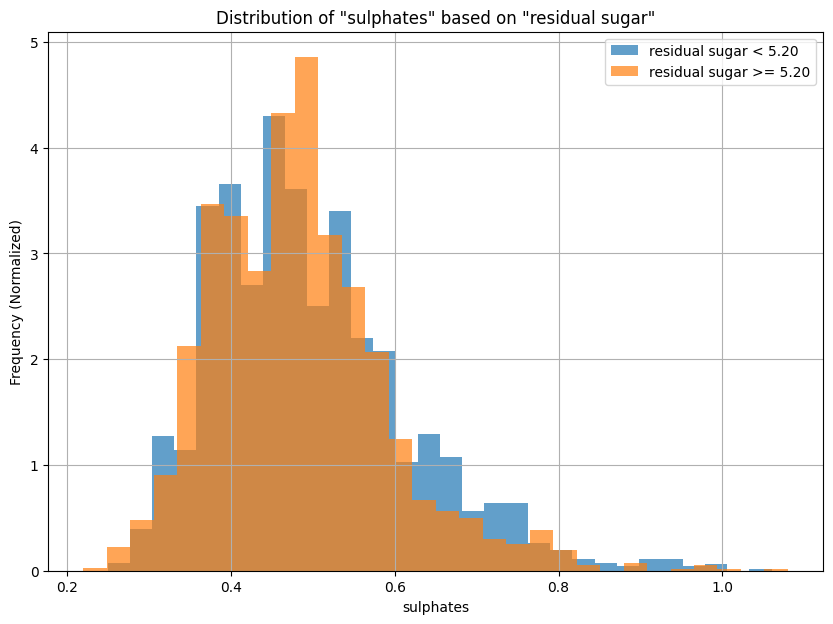

In [12]:
# YOUR CODE HERE

col1 = 'residual sugar'
col2 = 'sulphates'

plt.scatter(wine_data[col1], wine_data[col2], alpha=0.5)
plt.title(f'Dependency between {col1} and {col2}')
plt.xlabel(col1)
plt.ylabel(col2)
plt.grid(True)
plt.show()

threshold = wine_data[col1].median()
print(f"Using a threshold of t = {threshold:.2f} for '{col1}'")

low_sugar_wines = wine_data[wine_data[col1] < threshold]
high_sugar_wines = wine_data[wine_data[col1] >= threshold]

plt.figure(figsize=(10, 7))

plt.hist(low_sugar_wines[col2], bins=30, alpha=0.7, label=f'{col1} < {threshold:.2f}', density=True)

plt.hist(high_sugar_wines[col2], bins=30, alpha=0.7, label=f'{col1} >= {threshold:.2f}', density=True)

plt.title(f'Distribution of "{col2}" based on "{col1}"')
plt.xlabel(col2)
plt.ylabel('Frequency (Normalized)')
plt.legend()
plt.grid(True)
plt.show()

YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

Number of principal components: 6
Total variance explained by the first 6 components: 0.8136

Mean Squared Error of the model in Problem 5: 0.5632
Mean Squared Error of the PCA-based model: 0.6448


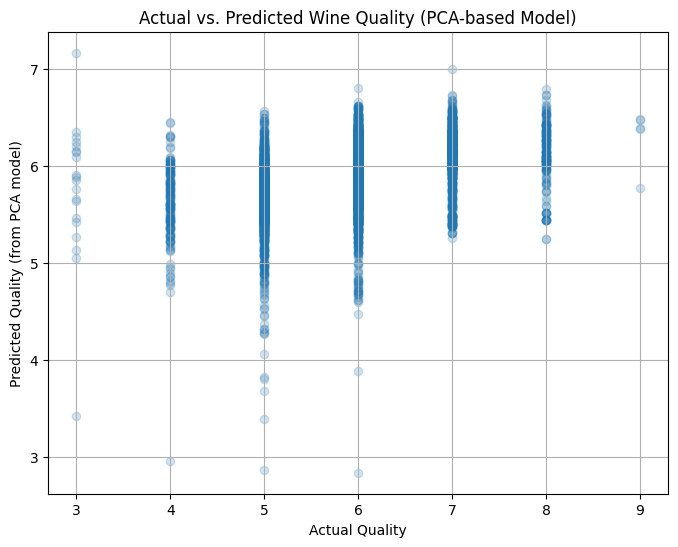

In [13]:
# YOUR CODE HERE

input_columns = wine_data.columns.drop('target')
X = wine_data[input_columns]
y = wine_data['target']

X_scaled = (X - X.mean()) / X.std()

n_pc = math.ceil(6)
pca = PCA(n_components=n_pc)

X_pca = pca.fit_transform(X_scaled)

explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Number of principal components: {n_pc}")
print(f"Total variance explained by the first {n_pc} components: {explained_variance:.4f}")

pca_model = sklearn.linear_model.LinearRegression()
pca_model.fit(X_pca, y)

pca_predictions = pca_model.predict(X_pca)
pca_mse = np.mean((y - pca_predictions)**2)

print(f"\nMean Squared Error of the model in Problem 5: 0.5632")
print(f"Mean Squared Error of the PCA-based model: {pca_mse:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y, pca_predictions, alpha=0.2)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality (from PCA model)")
plt.title("Actual vs. Predicted Wine Quality (PCA-based Model)")
lims = [min(y), max(y)]
plt.grid(True)
plt.show()

YOUR ANSWERS HERE

Data variation explained by the first 6 components: 0.8136

MSE of Model in Problem 5: 0.5632
MSE of PCA-based model: 0.6448

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [14]:
# YOUR CODE HERE

input_columns = wine_data.columns.drop('target')
X = wine_data[input_columns]

corr_matrix = X.corr().abs()

np.fill_diagonal(corr_matrix.values, np.nan)
highest_corr_pair = corr_matrix.stack().idxmax()
highest_corr_value = corr_matrix.stack().max()

print(f"The pair of input columns with the highest correlation: {highest_corr_pair}")
print(f"Their correlation is: {highest_corr_value:.4f}\n")

X_scaled = (X - X.mean()) / X.std()

n_components = math.ceil(len(input_columns) / 2)
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=input_columns
)

print("Principal Component Loadings:")
print(loadings)

print(f"\nLoadings for the most correlated pair {highest_corr_pair}:")
print(loadings.loc[list(highest_corr_pair)])

The pair of input columns with the highest correlation: ('residual sugar', 'density')
Their correlation is: 0.8390

Principal Component Loadings:
                           PC1       PC2       PC3       PC4       PC5  \
fixed acidity         0.157218  0.587558 -0.121368  0.018584  0.251048   
volatile acidity      0.005089 -0.051728  0.590971  0.274115  0.642617   
citric acid           0.144050  0.345295 -0.504397  0.148514  0.053905   
residual sugar        0.427408 -0.008749  0.214320 -0.273765  0.011391   
chlorides             0.212011  0.008800  0.102367  0.710712 -0.328628   
free sulfur dioxide   0.300334 -0.290355 -0.279410 -0.305585  0.176912   
total sulfur dioxide  0.406652 -0.244032 -0.124375 -0.060456  0.293010   
density               0.511524 -0.006297  0.129203 -0.022061 -0.084588   
pH                   -0.128832 -0.581344 -0.126672  0.097753 -0.119826   
sulphates             0.043379 -0.222695 -0.433244  0.442060  0.400585   
alcohol              -0.437238  0.035569

YOUR ANSWERS HERE

The pair of input columns with the highest correlation are Residual Sugar and Density. The proximity of the value of the principal components of these columns reflect this correlation. No other columns are as close in proximity as they are to each other.

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.


Identified an extreme outlier row at index 745:
fixed acidity             7.40000
volatile acidity          0.20000
citric acid               1.66000
residual sugar            2.10000
chlorides                 0.02200
free sulfur dioxide      34.00000
total sulfur dioxide    113.00000
density                   0.99165
pH                        3.26000
sulphates                 0.55000
alcohol                  12.20000
target                    6.00000
Name: 745, dtype: float64


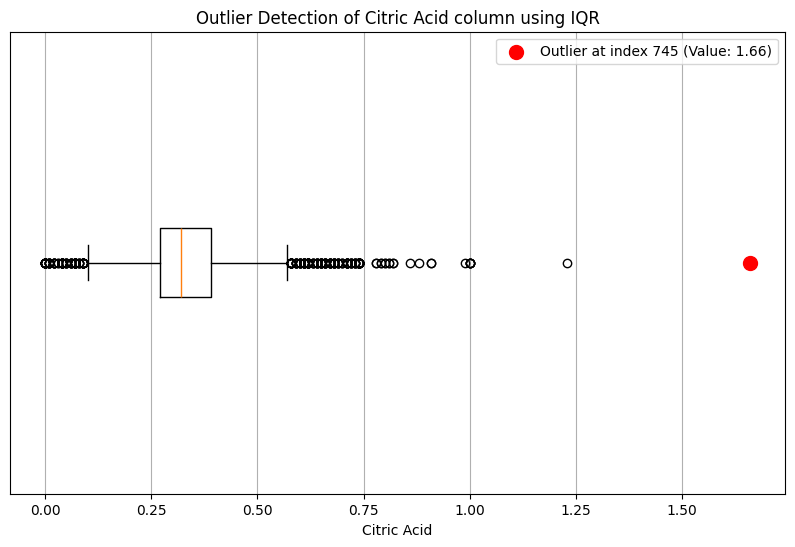

In [21]:
# YOUR CODE HERE

Q1 = wine_data["citric acid"].quantile(0.25)
Q3 = wine_data["citric acid"].quantile(0.75)
IQR = Q3 - Q1
upper_boundary = Q3 + 1.5 * IQR

outliers = wine_data[wine_data["citric acid"] > upper_boundary]
outlier_row = outliers.loc[outliers["citric acid"].idxmax()]
outlier_index = outliers["citric acid"].idxmax()
outlier_value = outlier_row["citric acid"]
print(f"\nIdentified an extreme outlier row at index {outlier_index}:")
print(outlier_row)

plt.figure(figsize=(10, 6))
plt.boxplot(wine_data["citric acid"], vert=False)

plt.scatter(outlier_value, 1, color='red', s=100, zorder=3, label=f'Outlier at index {outlier_index} (Value: {outlier_value})')

plt.title(f'Outlier Detection of Citric Acid column using IQR')
plt.xlabel("Citric Acid")
plt.yticks([])
plt.legend()
plt.grid(True)
plt.show()

YOUR ANSWERS HERE

Since the Citric Acid column has a positively skewed distribution, I decided to use the Interquartile Range method to identify an outlier. IQR is calculated by subtracting the 25th quantile from the 75th quantile. Since this column is right-skewed I calculated the upper bounds to identify outliers beyond that. The upper boundary is calculated by multiplying the IQR by 1.5 and then adding the 75th quantile to that value. I highlighted the chosen outlier to show how it sticks out a lot compared to the others. I chose a box plot because it shows where the quartiles, median, upper boundary, and lower boundary are, which are useful for this problem.

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE